In [19]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, kstest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler

sns.set()

In [2]:
data = pd.read_csv('data/processed/encoded_data.csv')

In [3]:
# perform Shapiro-Wilk test for normality
shapiro(data['price'])

c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7117764353752136, pvalue=0.0)

In [27]:
# perforn Kolmogorov-Smirnov test for normalist
kstest(np.log(data[['price']]), 'norm')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [25]:
# compute required values
scaler = RobustScaler()
model = scaler.fit(data[['sqft_living']])
scaled_data = model.transform(data[['sqft_living']])
 
# print scaled data
print(scaled_data)

[[-0.65178571]
 [ 0.58928571]
 [-1.01785714]
 ...
 [-0.79464286]
 [-0.27678571]
 [-0.79464286]]


<Axes: ylabel='Count'>

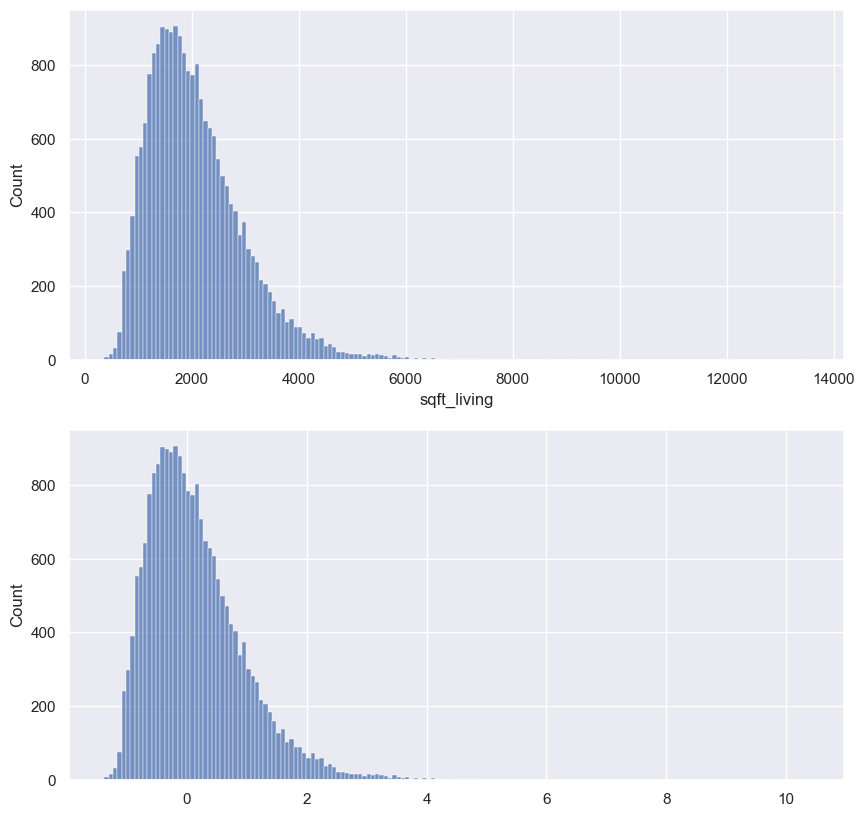

In [26]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

sns.histplot(x=data['sqft_living'], ax=axs[0])
sns.histplot(x=scaled_data.reshape(-1), ax=axs[1])
